In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('dark_background')

In [3]:
df = pd.read_csv('../datasets/updated_uber.csv')
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.shape

(200000, 7)

**Fare**
- The cost of each trip in USD


In [5]:
df['fare_amount'].describe()

count    200000.000000
mean         11.359955
std           9.901776
min         -52.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         499.000000
Name: fare_amount, dtype: float64

In [6]:
df['fare_amount'].isnull().sum()

0

In [7]:
fare_mean = df['fare_amount'].mean()
fare_std = df['fare_amount'].std()

df_fare = df[(df['fare_amount'] >= (fare_mean - fare_std)) & (df['fare_amount'] <= (fare_mean + fare_std))]
df_fare

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199994,12.0,2014-01-31 14:42:00 UTC,-73.983070,40.760770,-73.972972,40.754177,1
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [8]:
df_fare['fare_amount'].describe()

count    181342.000000
mean          8.836870
std           3.994925
min           2.500000
25%           5.700000
50%           8.000000
75%          11.000000
max          21.070000
Name: fare_amount, dtype: float64

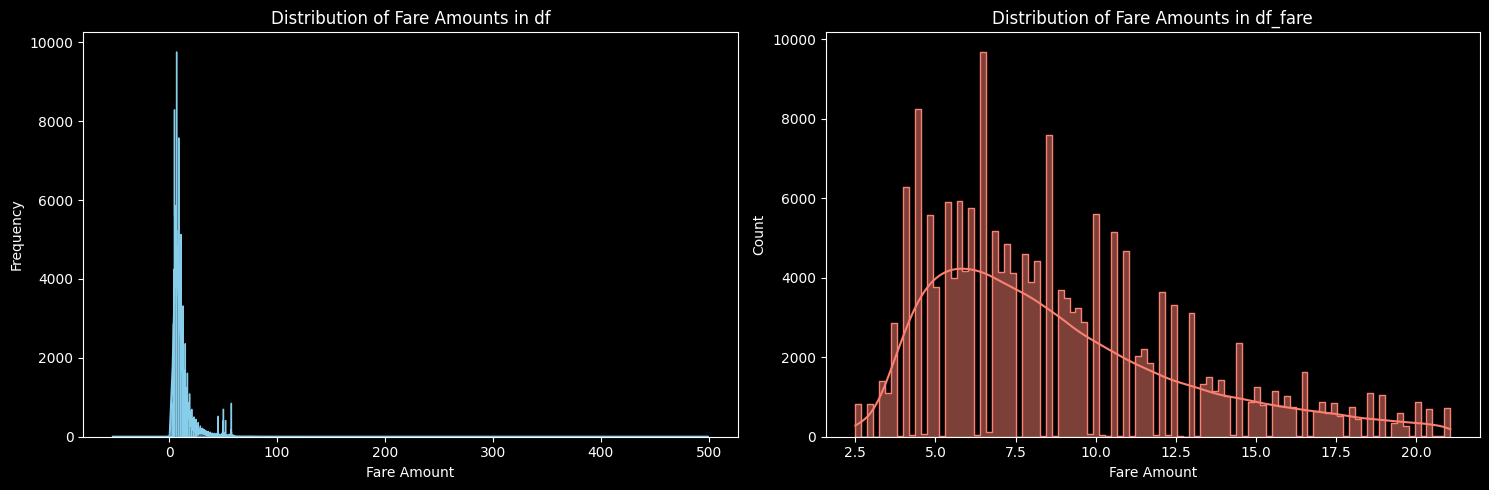

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data=df, x='fare_amount', element='step', ax=axes[0], color='skyblue',kde=True,line_kws={'color': 'darkblue'})
axes[0].set_title('Distribution of Fare Amounts in df')
axes[0].set_xlabel('Fare Amount')
axes[0].set_ylabel('Frequency')

# Plot the second histogram
sns.histplot(data=df_fare, x='fare_amount', element='step', ax=axes[1], color='salmon',kde=True,line_kws={'color': 'white'})
axes[1].set_title('Distribution of Fare Amounts in df_fare')
axes[1].set_xlabel('Fare Amount')

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

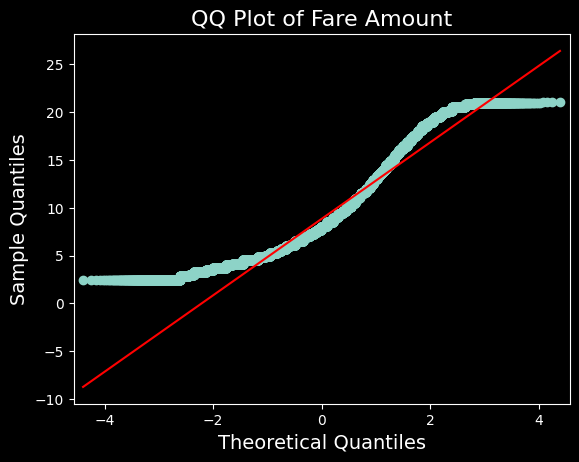

In [10]:
import statsmodels.api as sm
plt.figure(figsize=(10, 6))
qq_plot = sm.qqplot(df_fare['fare_amount'], line='s')

plt.title('QQ Plot of Fare Amount', fontsize=16)
plt.xlabel('Theoretical Quantiles', fontsize=14)
plt.ylabel('Sample Quantiles', fontsize=14)

plt.show()

In [11]:
import scipy.stats as stats
shapiro_test = stats.shapiro(df_fare['fare_amount'])
print(f"Shapiro-Wilk test statistic: {shapiro_test.statistic:.4f}, p-value: {shapiro_test.pvalue:.8f}")



Shapiro-Wilk test statistic: 0.9261, p-value: 0.00000000


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 181342.
  res = hypotest_fun_out(*samples, **kwds)


**Conclusions For Fare Amount**
- The HistPlot and KDE plot depict a right-skewed distribution of fare amounts, with a concentration of lower values and a tail extending towards higher amounts, confirmed by the QQ Plot.
- The Shapiro-Wilk test assesses that the data set does not follow normal distribution completely.

**Passenger Count**
-  The number of passengers in the vehicle

In [13]:
df['passenger_count'].describe()

count    200000.000000
mean          1.684535
std           1.385997
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         208.000000
Name: passenger_count, dtype: float64

In [14]:
df['passenger_count'].isnull().sum()

0

In [17]:
df['passenger_count'].unique()

array([  1,   3,   5,   2,   4,   6,   0, 208])

In [18]:
df['passenger_count'].value_counts()

passenger_count
1      138425
2       29428
5       14009
3        8881
4        4276
6        4271
0         709
208         1
Name: count, dtype: int64

In [27]:
df_passenger = df[(df['passenger_count'] != 0) & (df['passenger_count'] != 208)]
df_passenger

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [29]:
df_passenger['passenger_count'].value_counts()

passenger_count
1    138425
2     29428
5     14009
3      8881
4      4276
6      4271
Name: count, dtype: int64

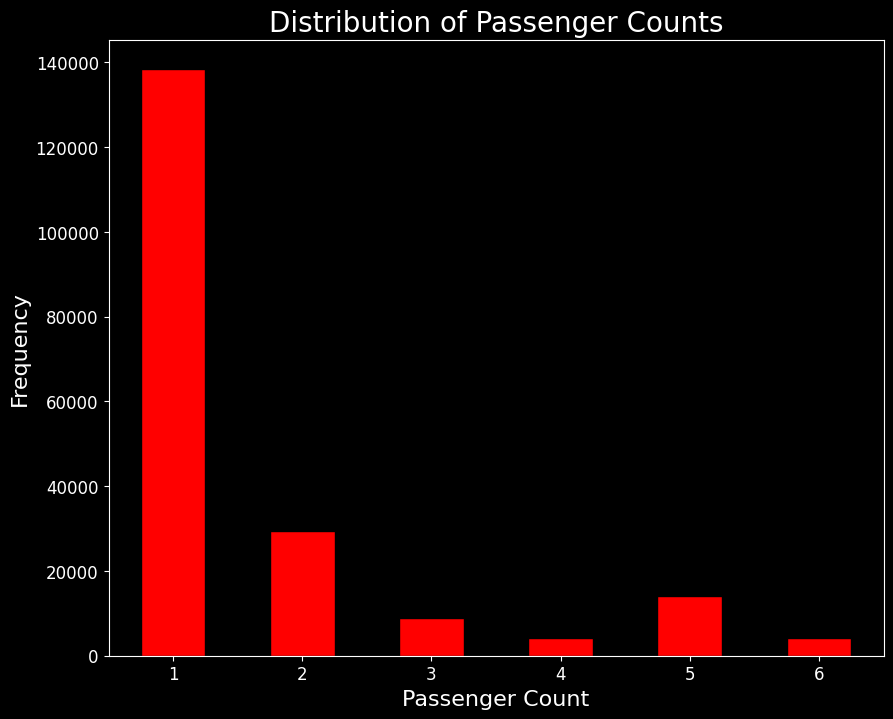

In [65]:
value_counts = df_passenger['passenger_count'].value_counts().sort_index()
plt.figure(figsize=(10, 8))
value_counts.plot(kind='bar', color='red', edgecolor='black')
plt.title('Distribution of Passenger Counts', fontsize=20)
plt.xlabel('Passenger Count', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(rotation=0, fontsize=12) 
plt.yticks(fontsize=12)
plt.show()

**Conclusion For Passenger Count**
- Most rides have just one passenger, dominating the distribution.
- All other rides with fewer passengers.

In [66]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
